# MP Neuron

<img src = "DLNN S05A01_1.png">

$x - input (boolean),
y - output (boolean),
b - threshold$

b - Threshold value ( 1 to number of features in given data)


### Goal : Find the value of b, such that - the output from our model is same as output we are expecting (true output)

#### To Find b - Brute force attack

In [81]:
#Breast cancer Wisconsin Diagnostic data set
#https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from random import randint
from sklearn.metrics import accuracy_score

In [83]:
data = pd.read_csv("data.csv")

In [84]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [85]:
data.drop("Unnamed: 32",axis = 1, inplace = True)

In [86]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [87]:
#change the index
data.set_index('id',inplace = True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [88]:
data['diagnosis'] = data['diagnosis'].map(lambda x: 1 if x=='M' else 0)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [89]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [90]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [91]:
data.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [92]:
#separating input and output
X = data.drop('diagnosis',axis =1)
Y = data['diagnosis']

In [93]:
type(X)

pandas.core.frame.DataFrame

In [94]:
type(Y)

pandas.core.series.Series

In [95]:
print(X.shape,Y.shape)

(569, 30) (569,)


In [96]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [97]:
Y.head()

id
842302      1
842517      1
84300903    1
84348301    1
84358402    1
Name: diagnosis, dtype: int64

# Train_Test_Split

In [98]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [99]:
#By default test data = 25%
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (426, 30) (143, 30)


In [100]:
print(Y.shape,Y_train.shape,Y_test.shape)

(569,) (426,) (143,)


In [101]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1)

In [102]:
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (512, 30) (57, 30)


In [103]:
print(np.mean(Y),np.mean(Y_train),np.mean(Y_test))

0.37258347978910367 0.3671875 0.42105263157894735


In [104]:
#Adding Stratify
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1, stratify = Y)

In [105]:
print(np.mean(Y),np.mean(Y_train),np.mean(Y_test))

0.37258347978910367 0.373046875 0.3684210526315789


In [106]:
#radom state
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1, stratify = Y, random_state = 6)

In [107]:
print(np.mean(Y),np.mean(Y_train),np.mean(Y_test))

0.37258347978910367 0.373046875 0.3684210526315789


# Modifying the data

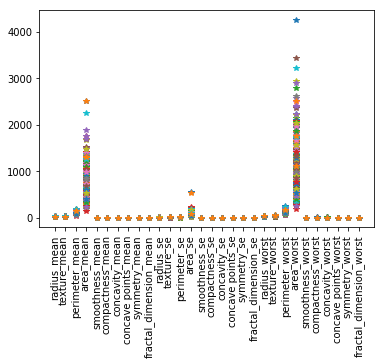

In [108]:
plt.plot(X_train.T,'*')
plt.xticks(rotation = 'vertical')
plt.show()

In [109]:
X_train_bi_wa = X_train['area_worst'].map(lambda x: 0 if x <2200 else 1)

In [110]:
X_train_bi_wa.value_counts()

0    495
1     17
Name: area_worst, dtype: int64

In [111]:
#Applying pandas cut
X_bin_train = X_train.apply(pd.cut, bins = 2, labels = [0,1])

In [112]:
X_bin_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
86211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85713702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9113455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8860702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
902975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


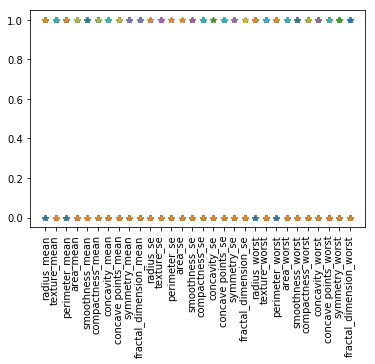

In [113]:
plt.plot(X_bin_train.T,'*')
plt.xticks(rotation = 'vertical')
plt.show()

In [114]:
X_bin_test = X_test.apply(pd.cut, bins = 2, labels = [0,1])

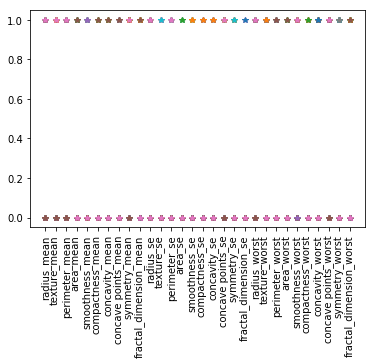

In [115]:
plt.plot(X_bin_test.T,'*')
plt.xticks(rotation = 'vertical')
plt.show()

In [116]:
type(X_bin_train),type(X_bin_test)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [117]:
X_bin_train = X_bin_train.values
X_bin_test  = X_bin_test.values

In [118]:
type(X_bin_train),type(X_bin_test)

(numpy.ndarray, numpy.ndarray)

In [119]:
Y_train = Y_train.values
Y_test = Y_test.values

# MP Neuron Model

In [120]:
b = 5
lhs = np.sum(X_bin_train[2,:])
lhs >=b

False

In [121]:
b = 5
i= randint(0,X_bin_train.shape[0])
print("for the row :",i)

if(np.sum(X_bin_train[i,:])>=b):
    print("MP Neuron's Prediction is Melignant")

else:
    print("MP Neuron's Prediction is Benign")
    
if (Y_train[i] == 1):
    print("Ground truth is Melignant")
    
else :
    print("Ground truth is Benign")

for the row : 163
MP Neuron's Prediction is Melignant
Ground truth is Melignant


In [122]:
#Lets compute the accuracy
b = 5
accurate_rows = 0

for x,y in zip(X_bin_train,Y_train):
    y_pred = (np.sum(x)>= b)
    
    if y_pred == y:
        accurate_rows += 1

print("Total number of Accurate rows = ",accurate_rows)
print("Accuracy = ",accurate_rows/X_bin_train.shape[0])

Total number of Accurate rows =  424
Accuracy =  0.828125


In [123]:
#Brute Force Attack

for b in range(X_bin_train.shape[1]+ 1):
    accurate_rows = 0

    for x,y in zip(X_bin_train,Y_train):
        y_pred = (np.sum(x)>= b)

        if y_pred == y:
            accurate_rows += 1

    print("At b  = ",b)
    print("Accuracy = ",accurate_rows/X_bin_train.shape[0]) 

At b  =  0
Accuracy =  0.373046875
At b  =  1
Accuracy =  0.755859375
At b  =  2
Accuracy =  0.828125
At b  =  3
Accuracy =  0.853515625
At b  =  4
Accuracy =  0.85546875
At b  =  5
Accuracy =  0.828125
At b  =  6
Accuracy =  0.796875
At b  =  7
Accuracy =  0.76171875
At b  =  8
Accuracy =  0.728515625
At b  =  9
Accuracy =  0.708984375
At b  =  10
Accuracy =  0.69140625
At b  =  11
Accuracy =  0.671875
At b  =  12
Accuracy =  0.6640625
At b  =  13
Accuracy =  0.658203125
At b  =  14
Accuracy =  0.650390625
At b  =  15
Accuracy =  0.64453125
At b  =  16
Accuracy =  0.63671875
At b  =  17
Accuracy =  0.6328125
At b  =  18
Accuracy =  0.62890625
At b  =  19
Accuracy =  0.626953125
At b  =  20
Accuracy =  0.626953125
At b  =  21
Accuracy =  0.626953125
At b  =  22
Accuracy =  0.626953125
At b  =  23
Accuracy =  0.626953125
At b  =  24
Accuracy =  0.626953125
At b  =  25
Accuracy =  0.626953125
At b  =  26
Accuracy =  0.626953125
At b  =  27
Accuracy =  0.626953125
At b  =  28
Accuracy =  

In [124]:
b = 4
accurate_rows = 0

for x,y in zip(X_bin_test,Y_test):
    y_pred = (np.sum(x)>= b)
    
    if y_pred == y:
        accurate_rows += 1

print("Total number of Accurate rows = ",accurate_rows)
print("Accuracy = ",accurate_rows/X_bin_test.shape[0])

Total number of Accurate rows =  42
Accuracy =  0.7368421052631579


In [125]:
#Using accuracy from scikit
b = 4
y_pred_test = []

for x in X_bin_test:
    y_pred = (np.sum(x)>= b)
    y_pred_test.append(y_pred)
    
accuracy = accuracy_score(y_pred_test,Y_test)
print("Accuracy = ",accuracy)

Accuracy =  0.7368421052631579


# MP Neuron Class

In [126]:
class MPNeuron:
    def __init__(self):
        self.b = None
        
    def Model(self,x):
        return (np.sum(x)>= self.b)
    
    def Predict(self,X):
        Y = []
        
        for x in X:
            result = self.Model(x)
            Y.append(result)
        return np.array(Y)
    
    def Fit(self,X,Y):
        accuracy = {}
        
        for b in range(X.shape[1]+1):
            self.b = b
            Y_pred = self.Predict(X)
            accuracy[b] = accuracy_score(Y_pred,Y)
        best_b = max(accuracy,key = accuracy.get)
        
        self.b = best_b
        print("The Optimal value of b is :",best_b)
        print("Highest Accuracy is :",accuracy[best_b])

In [127]:
mp_neuron = MPNeuron()

In [128]:
mp_neuron.Fit(X_bin_train,Y_train)

The Optimal value of b is : 4
Highest Accuracy is : 0.85546875


In [129]:
Y_test_pred = mp_neuron.Predict(X_bin_test)
accuracy = accuracy_score(Y_test_pred,Y_test)
print("Accuracy is ",accuracy)

Accuracy is  0.7368421052631579
